In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data as dr

In [31]:
tickers = ['ARKG','ARKK','GM','PLTR','TSLA']
data = pd.DataFrame(columns = tickers)

In [32]:
data[tickers] = dr.DataReader(tickers, data_source = 'yahoo', start = 
                            '2016-01-01', end='2020-12-31')['Adj Close']
print(data.head())

            ARKG       ARKK         GM  PLTR       TSLA
Date                                                   
2016-01-04   NaN  18.768906  27.775911   NaN  44.681999
2016-01-05   NaN  18.918982  27.042109   NaN  44.686001
2016-01-06   NaN  18.600067  26.074837   NaN  43.807999
2016-01-07   NaN  17.868446  25.007492   NaN  43.130001
2016-01-08   NaN  17.662094  24.623917   NaN  42.200001


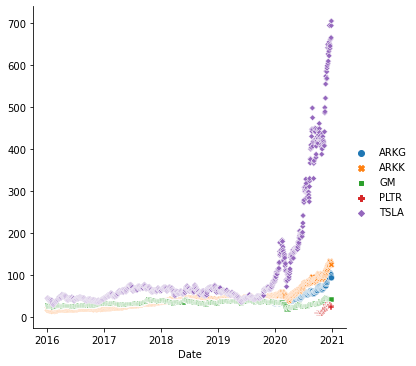

In [33]:
sns.relplot(data=data)

                ARKG      ARKK        GM      PLTR      TSLA
Date                                                        
2020-10-01  0.016481  0.027609  0.026698 -0.004211  0.044638
2020-10-02 -0.021155 -0.023482  0.002633 -0.027484 -0.073791
2020-10-05  0.060893  0.038670  0.016415 -0.018478  0.025513
2020-10-06  0.000446 -0.002294 -0.018088  0.096346 -0.027485
2020-10-07  0.043103  0.037002  0.040132  0.010101  0.027344


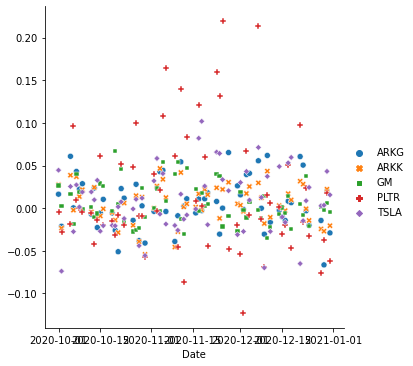

In [34]:
returns = data.pct_change()
returns.dropna(inplace=True)
print(returns.head())
sns.relplot(data=returns)

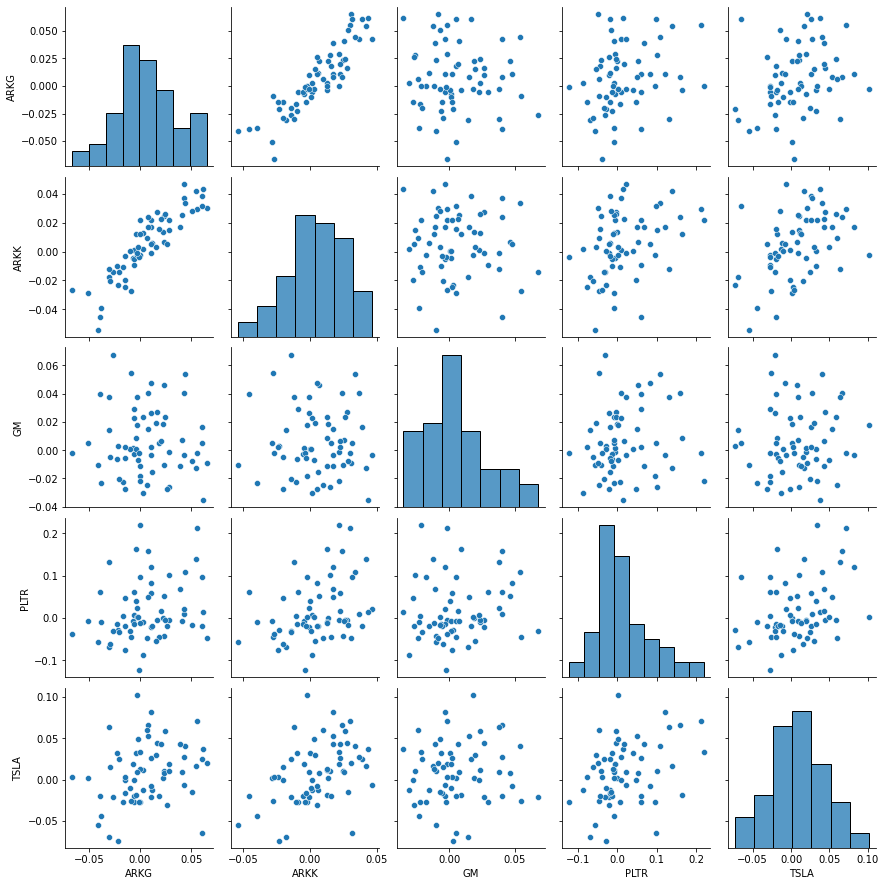

In [85]:
sns.pairplot(data=returns)

In [59]:
sns.displot(data=returns,col=data[0])

KeyError: 0

In [14]:
l = norm.ppf(.10)
u = norm.ppf(.85)

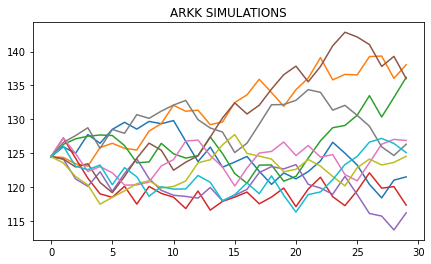

In [15]:
mean = returns.mean()
stdev = returns.std()
np.random.seed(42)
n = np.random.normal(size = (30,10))
rows = n.shape[0]
cols = n.shape[1]
for i in range(0,rows) :
    for j in range(0,cols) :
        if n[i][j] > u :
           n[i][j] = u       #sets upper limit
        elif n[i][j] < l :
             n[i][j] = l     #sets lower limit
        else :
             n[i][j] = n[i][j]
        n[i][j] = (stdev * n[i][j]) + mean
s = data.iloc[-1]
pred = np.zeros_like(n) + 1
pred[0] = s         #sets beginning point of simulations
for i in range(1,30) :
    pred[i] = pred[(i-1)] * (1 + n[(i-1)])
plt.figure(figsize = (7,4))
plt.title('{} SIMULATIONS'.format(ticker))    
for i in range(0,10) :
    plt.plot(pred[:, i])
plt.show()